In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [54]:
S0 = jsm_ancillary.load_sample("../../data/fiducial/S0_sample.h5")
Sup = jsm_ancillary.load_sample("../../data/dynamical_friction/DF_up.h5")
Sdown = jsm_ancillary.load_sample("../../data/dynamical_friction/DF_down.h5")
Sdowndown = jsm_ancillary.load_sample("../../data/dynamical_friction/DF_downdown.h5")
SHR = jsm_ancillary.load_sample("../../data/fiducial/S0HR_sample.h5")
Soff = jsm_ancillary.load_sample("../../data/dynamical_friction/DF_off.h5")

In [55]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [56]:
def measure_abundance_correlation(sample, mass_res, mask_orders=None, plot=True):

    final_mass = jsm_ancillary.make_matrix(sample, "sat_mass")
    acc_order = jsm_ancillary.make_matrix(sample, "sat_acc_order")
    final_order = jsm_ancillary.make_matrix(sample, "sat_order")
    z50 = np.array(sample.host_z50)

    if mask_orders=="1":
        order_mask = acc_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="2":
        order_mask = acc_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="3":
        order_mask = final_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="4":
        order_mask = final_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    abundance = np.sum(final_mass > mass_res, axis=1)
    correlation = jsm_stats.correlation(z50,  abundance)

    if plot:
        sns.kdeplot(x=np.log10(1+z50), y=abundance, levels=levelz, color="green", linestyles="--", bw_adjust=1.5)
        plt.title('$\\rho_{S}$ ='+f' {correlation:.2f}')
        plt.xlabel("log (1+z$_{50}$)")
        plt.ylabel("N subhalos")
        plt.xlim(-0.02, 0.61)
        plt.ylim(0,65)
        plt.show()

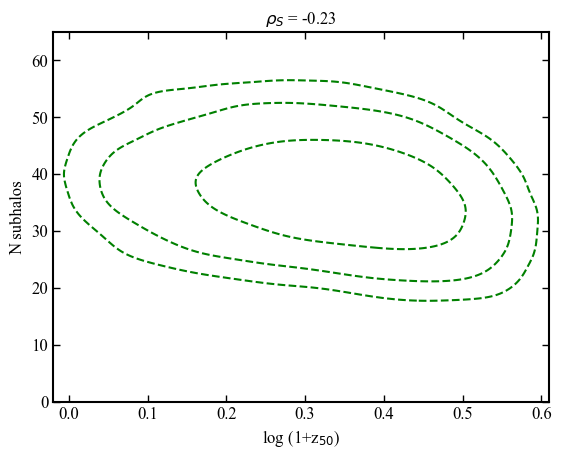

In [57]:
measure_abundance_correlation(Soff, 1e9, plot=True)

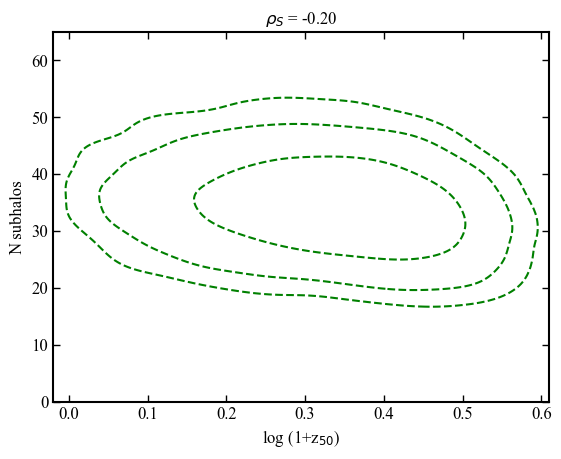

In [58]:
measure_abundance_correlation(Sdowndown, 1e9, plot=True)

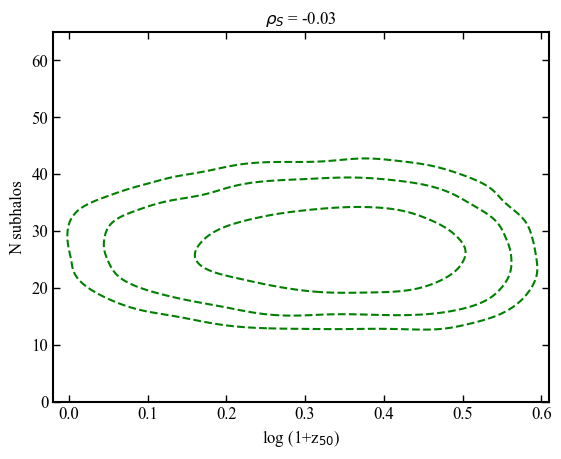

In [59]:
measure_abundance_correlation(Sdown, 1e9, plot=True)

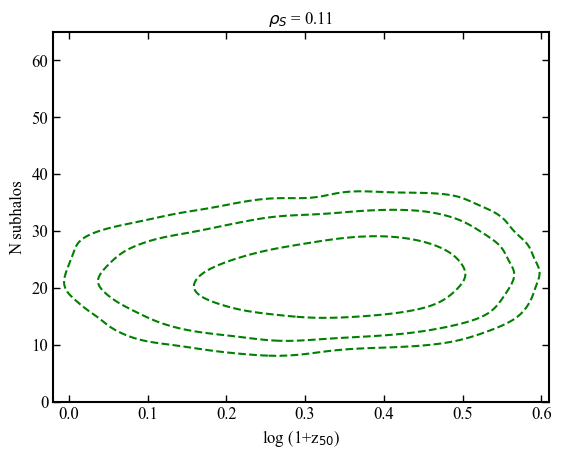

In [60]:
measure_abundance_correlation(S0, 1e9, plot=True)

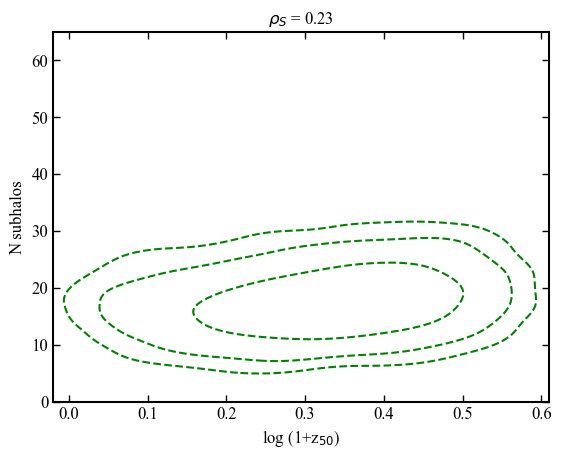

In [61]:
measure_abundance_correlation(Sup, 1e9, plot=True)

In [65]:
def measure_SHMF(sample, mass_res, mask_orders=None, plot=False):

    final_mass = jsm_ancillary.make_matrix(sample, "sat_mass")
    acc_order = jsm_ancillary.make_matrix(sample, "sat_acc_order")
    final_order = jsm_ancillary.make_matrix(sample, "sat_order")

    z50s = sample.host_z50
    norm = Normalize(vmin=np.log10(1+z50s.min()), vmax=np.log10(1+z50s.max()))
    cmap = plt.cm.viridis

    if mask_orders=="1":
        order_mask = acc_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="2":
        order_mask = acc_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="3":
        order_mask = final_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="4":
        order_mask = final_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    res_cut = final_mass > mass_res
    final_mass = np.where(res_cut, final_mass, np.nan)

    if plot:
        fig, ax = plt.subplots()

        for i, sat_pop in enumerate(final_mass):
            arr = sat_pop[~np.isnan(sat_pop)]
            arr = np.log10(np.sort(arr))
            Ngrt = np.arange(arr.shape[0])[::-1]
            c = cmap(norm(np.log10(1+z50s[i])))

            ax.step(arr, Ngrt, where="mid", color=c, alpha=0.2)

        ax.set_xlabel("log m(z=0)")
        ax.set_ylabel("N > log m(z=0)")

        # --- custom colorbar ---
        sm = ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])  # required by colorbar
        cbar = fig.colorbar(sm, ax=ax, label="log (1+z$_{50}$)")
        ax.set_yscale("log")
        ax.set_ylim(1, 100)
        plt.show()

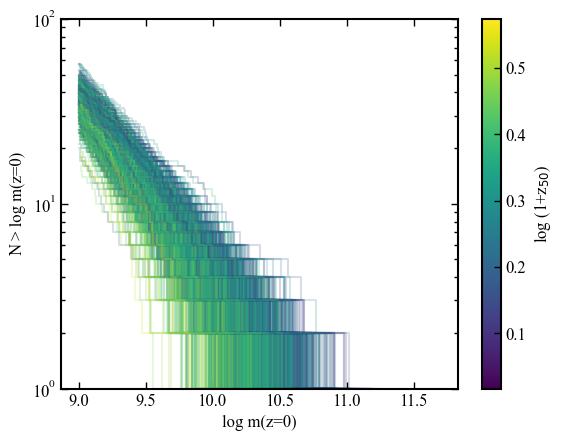

In [66]:
measure_SHMF(Soff[0:1000], 1e9, plot=True)

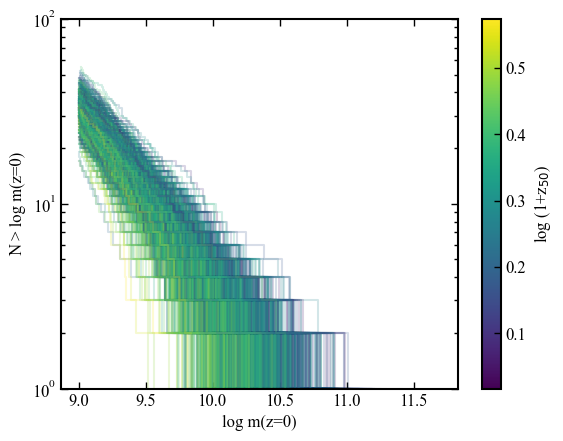

In [67]:
measure_SHMF(Sdowndown[0:1000], 1e9, plot=True)

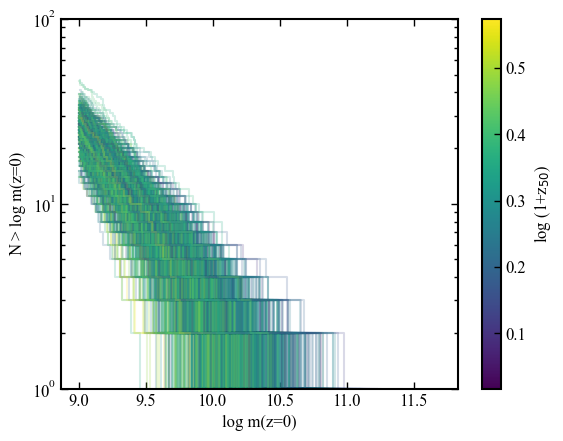

In [68]:
measure_SHMF(Sdown[0:1000], 1e9, plot=True)

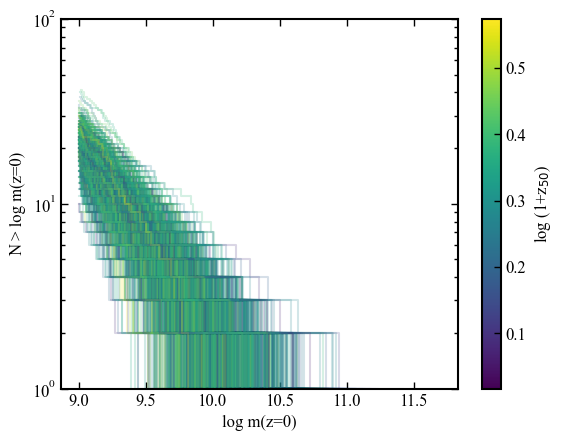

In [69]:
measure_SHMF(S0[0:1000], 1e9, plot=True)

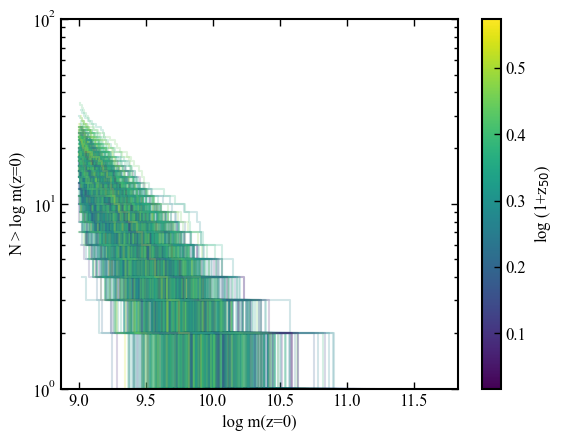

In [70]:
measure_SHMF(Sup[0:1000], 1e9, plot=True)